In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics
import ta
import warnings
warnings.filterwarnings('ignore')

## importing dataset

In [86]:
df = pd.read_csv('./data//BTC-USD(1).csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [87]:
df.shape

(2747, 7)

In [88]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2.747000e+03
mean,11668.600272,11981.034949,11325.596907,11682.892098,11682.892098,1.484704e+10
std,16323.683853,16759.568657,15825.584507,16330.191582,16330.191582,1.994819e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,609.122009,611.894501,606.309479,609.234009,609.234009,8.161285e+07
50%,6371.850098,6500.870117,6285.629883,6376.709961,6376.709961,5.227550e+09
75%,10728.271485,10992.468751,10412.890137,10755.395019,10755.395019,2.500517e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2747 non-null   object 
 1   Open       2747 non-null   float64
 2   High       2747 non-null   float64
 3   Low        2747 non-null   float64
 4   Close      2747 non-null   float64
 5   Adj Close  2747 non-null   float64
 6   Volume     2747 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 150.4+ KB


In [90]:
df[df['Close'] == df['Adj Close']].shape, df.shape

((2747, 7), (2747, 7))

In [91]:
df = df.drop(['Adj Close'], axis=1)

In [92]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

## Feature Engineering


In [93]:
splitted = df['Date'].str.split('-', expand=True)

df['year'] = splitted[0].astype('int')
df['month'] = splitted[1].astype('int')
df['day'] = splitted[2].astype('int')

# Convert the 'Date' column to datetime objects
df['Date'] = pd.to_datetime(df['Date']) 

df.head()


,Date,Open,High,Low,Close,Volume,year,month,day
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,2014,9,17
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,2014,9,18
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,2014,9,19
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,2014,9,20
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,2014,9,21


In [95]:
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()

,Date,Open,High,Low,Close,Volume,year,month,day,is_quarter_end
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,2014,9,17,1
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,2014,9,18,1
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,2014,9,19,1
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,2014,9,20,1
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,2014,9,21,1


In [96]:
df['open-close']  = df['Open'] - df['Close']
df['low-high']  = df['Low'] - df['High']
df.head()

,Date,Open,High,Low,Close,Volume,year,month,day,is_quarter_end,open-close,low-high
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,2014,9,17,1,8.529999,-15.752014
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,2014,9,18,1,32.419983,-43.755981
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,2014,9,19,1,29.307007,-43.302978
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,2014,9,20,1,-14.230988,-33.412994
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,2014,9,21,1,9.263977,-19.244995


In [97]:
# try different features see which helps



df['daily_return'] = df['Close'].pct_change()
df['ma_7'] = df['Close'].rolling(7).mean()  # 7-day moving average
df['close_t-1'] = df['Close'].shift(1)
df['close_t-2'] = df['Close'].shift(2)
df['open_t-1'] = df['Open'].shift(1)
df['volume_t-1'] = df['Volume'].shift(1)
df['rolling_mean_3'] = df['Close'].rolling(window=3).mean()
df['rolling_std_3'] = df['Close'].rolling(window=3).std()

df['pct_change_close'] = df['Close'].pct_change()
df['pct_change_open'] = df['Open'].pct_change()
df['pct_change_high'] = df['High'].pct_change()
df['pct_change_low'] = df['Low'].pct_change()

df['body'] = abs(df['Close'] - df['Open'])
df['upper_shadow'] = df['High'] - df[['Close', 'Open']].max(axis=1)
df['lower_shadow'] = df[['Close', 'Open']].min(axis=1) - df['Low']

df['trend_day2_vs_day1'] = np.where(df['Close'].shift(2) > df['Close'].shift(3), 1, 0)
df['trend_day3_vs_day2'] = np.where(df['Close'].shift(1) > df['Close'].shift(2), 1, 0)

#df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)
df['target'] = np.where((df['Close'].shift(-1) - df['Close']) > 0.005 * df['Close'], 1, 0)

df['rsi'] = ta.momentum.RSIIndicator(df['Close'], window=14).rsi()
df['macd'] = ta.trend.MACD(df['Close']).macd()
df['ema_12'] = ta.trend.EMAIndicator(df['Close'], window=12).ema_indicator()
df['ema_26'] = ta.trend.EMAIndicator(df['Close'], window=26).ema_indicator()

df.dropna(inplace=True)
df.head(10)

,Date,Open,High,Low,Close,Volume,year,month,day,is_quarter_end,...,body,upper_shadow,lower_shadow,trend_day2_vs_day1,trend_day3_vs_day2,target,rsi,macd,ema_12,ema_26
25,2014-10-12,362.605988,379.433014,356.144012,378.549011,17552800,2014,10,12,0,...,15.943023,0.884003,6.461976,0,1,1,48.311573,-17.904763,363.683813,381.588575
26,2014-10-13,377.920990,397.226013,368.897003,390.414001,35221400,2014,10,13,0,...,12.493011,6.812012,9.023987,1,1,1,52.739806,-14.446161,367.796149,382.242311
27,2014-10-14,391.691986,411.697998,391.324005,400.869995,38491500,2014,10,14,0,...,9.178009,10.828003,0.367981,1,1,0,56.293392,-10.737706,372.884433,383.622139
28,2014-10-15,400.954987,402.226990,388.765991,394.773010,25267100,2014,10,15,0,...,6.181977,1.272003,6.007019,1,1,0,53.755190,-8.196223,376.251907,384.448130
29,2014-10-16,394.518005,398.807007,373.070007,382.556000,26990000,2014,10,16,0,...,11.962005,4.289002,9.485993,1,0,0,48.988694,-7.086205,377.221767,384.307972
30,2014-10-17,382.756012,385.477997,375.389008,383.757996,13600700,2014,10,17,0,...,1.001984,1.720001,7.367004,0,0,1,49.463490,-6.039892,378.227341,384.267233
31,2014-10-18,383.976013,395.157990,378.971008,391.441986,11416800,2014,10,18,0,...,7.465973,3.716004,5.005005,0,1,0,52.506761,-4.538333,380.260363,384.798696
32,2014-10-19,391.253998,393.938995,386.457001,389.545990,5914570,2014,10,19,0,...,1.708008,2.684997,3.088989,1,1,0,51.679788,-3.461426,381.688921,385.150347
33,2014-10-20,389.230988,390.084015,378.252014,382.845001,16419000,2014,10,20,0,...,6.385987,0.853027,4.592987,1,0,1,48.756987,-3.112802,381.866780,384.979581
34,2014-10-21,382.420990,392.645996,380.834015,386.475006,14188900,2014,10,21,0,...,4.054016,6.170990,1.586975,0,0,0,50.393685,-2.514616,382.575737,385.090353


In [98]:
print("Class Distribution:\n", df['target'].value_counts())

Class Distribution:
 target
0    1536
1    1186
Name: count, dtype: int64


In [ ]:

features = df[[
    'low-high', 
    'pct_change_close',
    'pct_change_open',
    'pct_change_high',
    'pct_change_low',
    'body',
    'upper_shadow',
    'lower_shadow',
    'rsi',
    'macd',
    'ema_12'
]]

target = df['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)
split_index = int(len(features) * 0.7)
X_train = features[:split_index]
X_valid = features[split_index:]
Y_train = target[:split_index]
Y_valid = target[split_index:]

## Model Development and Evaluation

In [100]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

Accuracy: 0.5018359853121175

Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.64      0.59       452
           1       0.42      0.33      0.37       365

    accuracy                           0.50       817
   macro avg       0.48      0.48      0.48       817
weighted avg       0.49      0.50      0.49       817



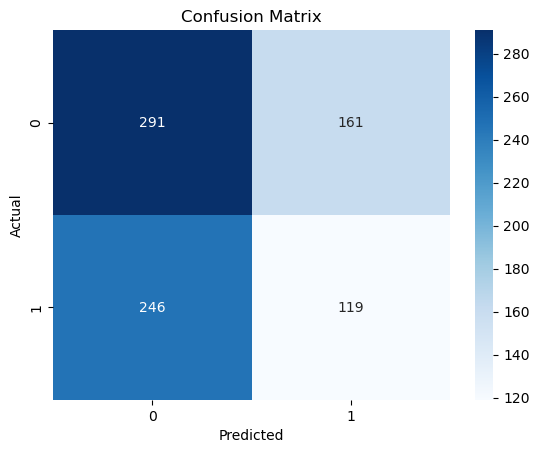

In [101]:
#model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=1.3)
model.fit(X_train, Y_train)
Y_pred = model.predict(X_valid)
print("Accuracy:", accuracy_score(Y_valid, Y_pred))

# Detailed metrics
print("\nClassification Report:\n", classification_report(Y_valid, Y_pred))

# Confusion matrix
cm = confusion_matrix(Y_valid, Y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

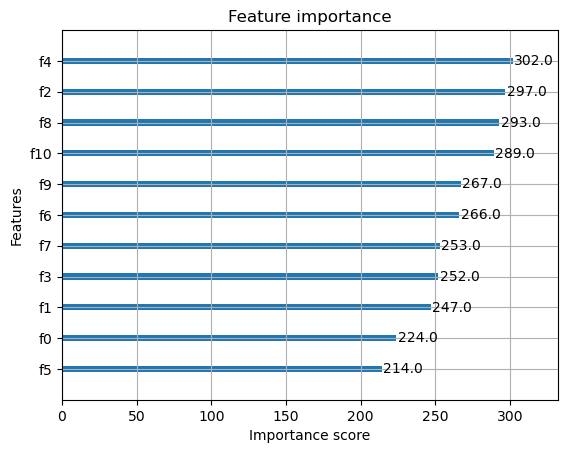

In [102]:
from xgboost import plot_importance
plot_importance(model)

In [103]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, features, target, cv=5)
print("Cross-validated accuracy:", scores.mean())

Cross-validated accuracy: 0.5297605234754453


In [105]:
# (as a sanity baseline)
models = [LogisticRegression(), SVC(kernel='poly', probability=True)]

for i in range(2):
  models[i].fit(X_train, Y_train)

  print(f'{models[i]} : ')
  print('Training Accuracy : ', metrics.roc_auc_score(Y_train, models[i].predict_proba(X_train)[:,1]))
  print('Validation Accuracy : ', metrics.roc_auc_score(Y_valid, models[i].predict_proba(X_valid)[:,1]))
  print()


LogisticRegression() : 
Training Accuracy :  0.5705972376410731
Validation Accuracy :  0.5221723845314584

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.6313727296834479
Validation Accuracy :  0.505012728815614



In [ ]:
# Split data first
split_index = int(len(df) * 0.7)
train_df = df.iloc[:split_index]
valid_df = df.iloc[split_index:]

# Separate features and target
features = [ 'pct_change_open', 'pct_change_high', 
            'pct_change_low', 'body', 'upper_shadow', 'lower_shadow', 'rsi', 'macd', 'ema_12']
target = 'target'

X_train = train_df[features]
Y_train = train_df[target]
X_valid = valid_df[features]
Y_valid = valid_df[target]

# Scale using training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

In [ ]:
print(Y_train.value_counts(normalize=True))
print(Y_valid.value_counts(normalize=True))

target
0    0.568966
1    0.431034
Name: proportion, dtype: float64
target
0    0.551508
1    0.448492
Name: proportion, dtype: float64


In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Convert data to DMatrix (optimized for XGBoost)
dtrain = xgb.DMatrix(X_train_scaled, label=Y_train)
dvalid = xgb.DMatrix(X_valid_scaled, label=Y_valid)

# Initial model with early stopping
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'eta': 0.1,
    'max_depth': 6,
    'subsample': 0.8,
    'colsample_bytree': 0.8
}

model = xgb.train(
    params,
    dtrain,
    num_boost_round=1000,
    evals=[(dvalid, 'eval')],
    early_stopping_rounds=50,
    verbose_eval=10
)

# Hyperparameter tuning 
param_grid = {
    'max_depth': [2, 3, 4],
    'learning_rate': [0.001, 0.01],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.2],  # Regularization to prevent overfitting
    'reg_lambda': [1, 2],
}


xgb_clf = xgb.XGBClassifier(objective='binary:logistic', n_estimators=100)
grid_search = GridSearchCV(
    estimator=xgb_clf,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=3
)
grid_search.fit(X_train_scaled, Y_train)
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

[0]	eval-logloss:0.68860


[10]	eval-logloss:0.69513
[20]	eval-logloss:0.70607
[30]	eval-logloss:0.71057
[40]	eval-logloss:0.71860
[50]	eval-logloss:0.72720
[53]	eval-logloss:0.73030
Best Parameters: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.001, 'max_depth': 2, 'reg_lambda': 2, 'subsample': 0.8}


In [ ]:

for lag in [3,4,5,6,7]:
    df[f'close_lag_{lag}'] = df['Close'].shift(lag)

df['rolling_vol_14'] = df['Close'].pct_change().rolling(window=14).std()

df['obv'] = ta.volume.OnBalanceVolumeIndicator(df['Close'], df['Volume']).on_balance_volume()

# Drop NA again after new features
df.dropna(inplace=True)
df.head(10)

,Date,Open,High,Low,Close,Volume,year,month,day,is_quarter_end,...,macd,ema_12,ema_26,close_lag_3,close_lag_4,close_lag_5,close_lag_6,close_lag_7,rolling_vol_14,obv
95,2014-12-21,329.542999,329.628998,318.903015,320.842987,15207600,2014,12,21,1,...,-13.067370,334.207946,347.275316,311.395996,319.776001,327.062012,345.345001,351.631989,0.024938,-106987650
96,2014-12-22,321.067993,334.117004,320.424988,331.885986,22315100,2014,12,22,1,...,-12.284644,333.850721,346.135365,317.842987,311.395996,319.776001,327.062012,345.345001,0.026590,-84672550
97,2014-12-23,332.016998,336.286987,329.601990,334.571991,16574200,2014,12,23,1,...,-11.317133,333.961686,345.278819,329.955994,317.842987,311.395996,319.776001,327.062012,0.026107,-68098350
98,2014-12-24,334.385010,334.740997,321.356995,322.533997,15092300,2014,12,24,1,...,-11.390438,332.203580,343.594017,320.842987,329.955994,317.842987,311.395996,319.776001,0.027347,-83190650
99,2014-12-25,322.286011,322.670013,316.958008,319.007996,9883640,2014,12,25,1,...,-11.599341,330.173490,341.772831,331.885986,320.842987,329.955994,317.842987,311.395996,0.026954,-93074290
100,2014-12-26,319.152008,331.424011,316.627014,327.924011,16410500,2014,12,26,1,...,-10.919576,329.827416,340.746992,334.571991,331.885986,320.842987,329.955994,317.842987,0.028338,-76663790
101,2014-12-27,327.583008,328.911011,312.630005,315.863007,15185200,2014,12,27,1,...,-11.224688,327.679046,338.903734,322.533997,334.571991,331.885986,320.842987,329.955994,0.029523,-91848990
102,2014-12-28,316.160004,320.028015,311.078003,317.239014,11676600,2014,12,28,1,...,-11.226053,326.072887,337.298940,319.007996,322.533997,334.571991,331.885986,320.842987,0.029213,-80172390
103,2014-12-29,317.700989,320.266998,312.307007,312.670013,12302500,2014,12,29,1,...,-11.463669,324.010906,335.474575,327.924011,319.007996,322.533997,334.571991,331.885986,0.029128,-92474890
104,2014-12-30,312.718994,314.808990,309.372986,310.737000,12528300,2014,12,30,1,...,-11.673395,321.968767,333.642162,315.863007,327.924011,319.007996,322.533997,334.571991,0.025919,-105003190


In [ ]:
from sklearn.metrics import classification_report, roc_auc_score

preds = best_model.predict(X_valid_scaled)
print(classification_report(Y_valid, preds))
print(f"AUC-ROC: {roc_auc_score(Y_valid, best_model.predict_proba(X_valid_scaled)[:,1])}")

              precision    recall  f1-score   support

           0       0.55      1.00      0.71       448
           1       0.00      0.00      0.00       361

    accuracy                           0.55       809
   macro avg       0.28      0.50      0.36       809
weighted avg       0.31      0.55      0.39       809

AUC-ROC: 0.5328174465769687


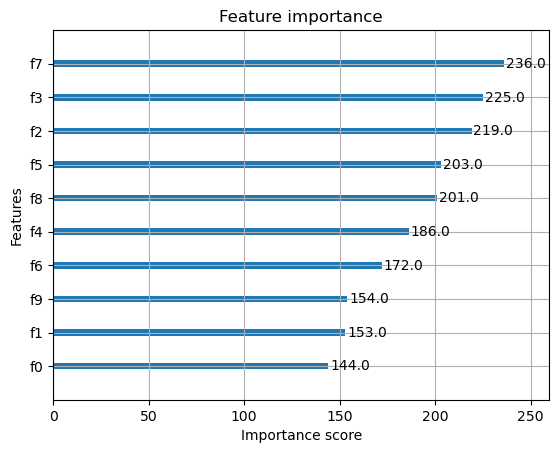

In [ ]:
xgb.plot_importance(model)
plt.show()